In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = pd.read_excel('D:/rawdata/NIFTY_high_raw.xlsx', sheet_name = 'Sheet1')

In [7]:
data.head()

,security,date,close,open_interest_PE,open_interest_CE,PCR_OI,yearly_oi_pct,max_oi_flag
0,NIFTY,2014-01-02,6221.15,24.4338,29.4950,0.828405,5.5777,0
1,NIFTY,2014-01-03,6211.15,27.8946,29.8237,0.935317,19.1235,0
2,NIFTY,2014-01-06,6191.45,29.6520,30.8565,0.960964,21.9124,0
3,NIFTY,2014-01-07,6162.25,30.9997,32.0710,0.966596,22.3108,0
4,NIFTY,2014-01-08,6174.60,32.0540,31.5283,1.016674,29.0837,0


In [17]:
data2 = data[['date','close','PCR_OI']]

In [19]:
data2 = data2.set_index(['date'])

In [20]:
data2.head()

,close,PCR_OI
date,,
2014-01-02,6221.15,0.828405
2014-01-03,6211.15,0.935317
2014-01-06,6191.45,0.960964
2014-01-07,6162.25,0.966596
2014-01-08,6174.60,1.016674


In [56]:
maxpcr = max(data2.PCR_OI)

In [57]:
maxpcr

3.305608130500423

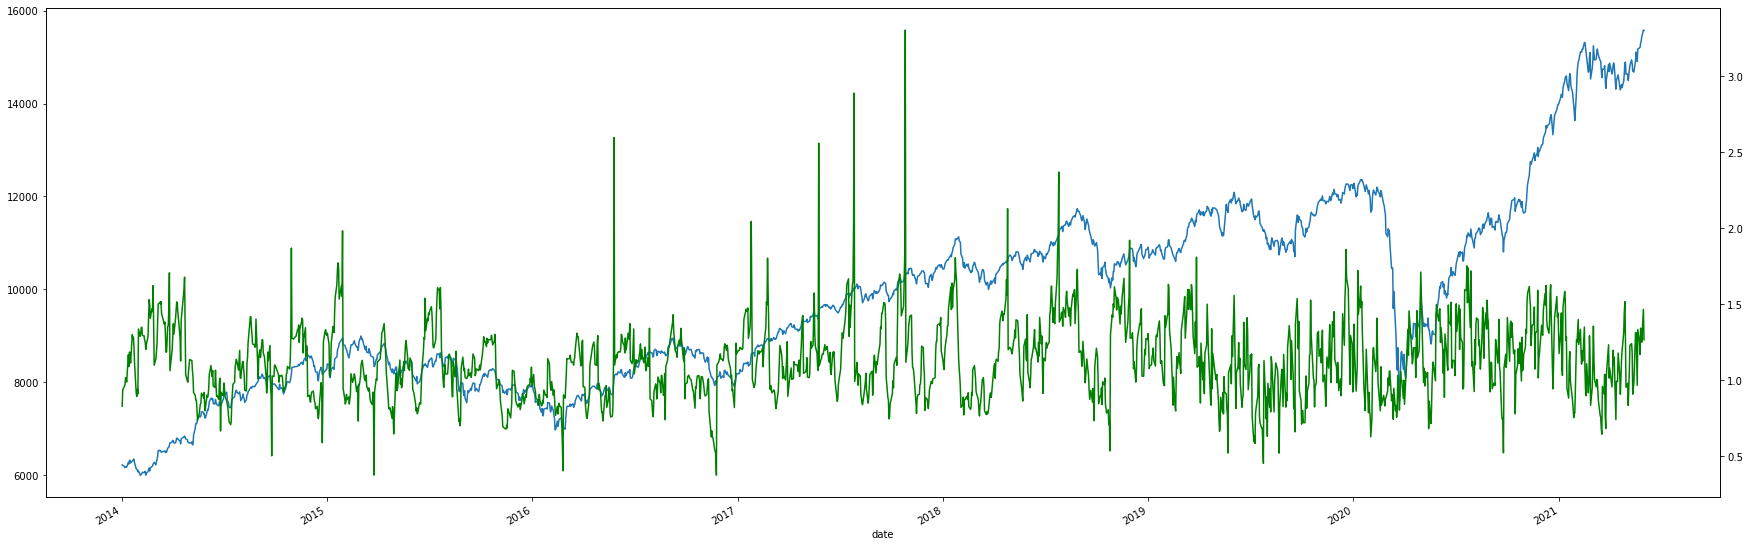

In [64]:
plt.figure(figsize=(30, 10))
data2.close.plot()
data2.PCR_OI.plot(secondary_y=True, style='g')
plt.show()

In [76]:
data2['low_pcr_flag'] = (data2['PCR_OI']< 0.8)

In [94]:
data2.head(10)

,close,PCR_OI,low_pcr_flag
date,,,
2014-01-02,6221.15,0.828405,False
2014-01-03,6211.15,0.935317,False
2014-01-06,6191.45,0.960964,False
2014-01-07,6162.25,0.966596,False
2014-01-08,6174.60,1.016674,False
2014-01-09,6168.35,1.013779,False
2014-01-10,6171.45,0.987600,False
2014-01-13,6272.75,1.167835,False
2014-01-14,6241.85,1.089607,False


In [95]:

test = data2['low_pcr_flag'][:5].any()
test

False

In [100]:
len(data2['low_pcr_flag'])

1830

In [96]:
multiple_low_flag = []

In [112]:
for i in range(2):
    print(i)

0
1


In [124]:
multiple = []
multiple[0].values = 'test'

IndexError: list index out of range

In [132]:
multiple=[]

for i in range(len(data2['low_pcr_flag'])):
    flag= data2['low_pcr_flag'][i-5:i].any()
    multiple.append(flag)

data2['multiple_low_flag'] = multiple    



In [140]:
data2['final_flag'] = (data2['low_pcr_flag'] == True) & (data2['multiple_low_flag'] == False)
data2['5d_ret'] = data2.close.pct_change(-5)

In [141]:
data2.to_csv('D:/rawdata/test.csv')

In [157]:
data2.head()

,close,PCR_OI,low_pcr_flag,multiple_low_flag,final_flag,5d_ret,2d_ret,10d_ret
date,,,,,,,,
2014-01-02,6221.15,0.828405,False,False,False,-0.008487,-0.004774,0.015713
2014-01-03,6211.15,0.935317,False,False,False,-0.006392,-0.007873,0.008131
2014-01-06,6191.45,0.960964,False,False,False,0.013131,-0.002721,0.018170
2014-01-07,6162.25,0.966596,False,False,False,0.012917,0.000990,0.024593
2014-01-08,6174.60,1.016674,False,False,False,0.023694,-0.000510,0.026617


In [161]:
data2['5d_dd'] = data2['5d_ret'].rolling(5).min()

In [162]:
data2.head(10)

,close,PCR_OI,low_pcr_flag,multiple_low_flag,final_flag,5d_ret,2d_ret,10d_ret,5d_dd
date,,,,,,,,,
2014-01-02,6221.15,0.828405,False,False,False,-0.008487,-0.004774,0.015713,NaN
2014-01-03,6211.15,0.935317,False,False,False,-0.006392,-0.007873,0.008131,NaN
2014-01-06,6191.45,0.960964,False,False,False,0.013131,-0.002721,0.018170,NaN
2014-01-07,6162.25,0.966596,False,False,False,0.012917,0.000990,0.024593,NaN
2014-01-08,6174.60,1.016674,False,False,False,0.023694,-0.000510,0.026617,-0.008487
2014-01-09,6168.35,1.013779,False,False,False,0.024407,0.016925,0.028744,-0.006392
2014-01-10,6171.45,0.987600,False,False,False,0.014616,0.011407,0.015442,0.012917
2014-01-13,6272.75,1.167835,False,False,False,0.004974,0.007676,-0.021825,0.004974
2014-01-14,6241.85,1.089607,False,False,False,0.011527,0.012344,-0.018520,0.004974


In [144]:
data2['5d_ret'] = data2.close.pct_change(5).shift(-5)
data2['5d_dd'] = data2.close.
data2['2d_ret'] = data2.close.pct_change(2).shift(-2)
data2['10d_ret'] = data2.close.pct_change(10).shift(-10)


In [146]:
final_data = data2

In [ ]:
final_data = final_data.drop(columns= ['low_pcr_flag','multiple_low_flag'])

In [150]:
final_data.head()

,close,PCR_OI,final_flag,5d_ret,2d_ret,10d_ret
date,,,,,,
2014-01-02,6221.15,0.828405,False,-0.008487,-0.004774,0.015713
2014-01-03,6211.15,0.935317,False,-0.006392,-0.007873,0.008131
2014-01-06,6191.45,0.960964,False,0.013131,-0.002721,0.018170
2014-01-07,6162.25,0.966596,False,0.012917,0.000990,0.024593
2014-01-08,6174.60,1.016674,False,0.023694,-0.000510,0.026617


In [151]:
final_data2 =  final_data[final_data['final_flag']]



,close,PCR_OI,final_flag,5d_ret,2d_ret,10d_ret
date,,,,,,
2014-05-16,7203.00,0.735325,True,0.022782,0.010065,0.003741
2014-05-29,7235.65,0.797885,True,0.032955,0.017531,0.057251
2014-06-26,7493.20,0.665484,True,0.029573,0.015768,0.009949
2014-07-10,7567.75,0.772628,True,0.009607,-0.015011,0.034733
2014-09-25,7911.85,0.501441,True,-0.007514,0.005947,-0.006048
2014-12-16,8067.60,0.771001,True,0.024716,0.011366,0.026662
2015-02-26,8683.85,0.729963,True,0.027499,0.025104,0.010612
2015-03-26,8342.15,0.374229,True,0.038090,0.017999,0.058960
2015-04-27,8213.80,0.748620,True,0.013514,0.003159,-0.010574


In [156]:
result = []
result['5d_ret'] = [1,2]
result['10d_ret'] = [np.average(data2['10d_ret']),max((data2['10d_ret']))]

TypeError: list indices must be integers or slices, not str

In [152]:
final_data2.to_csv('D:/rawdata/test2.csv')

In [92]:
data2['multiple_low_flag'] = data2['low_pcr_flag'].any[:5]

TypeError: 'method' object is not subscriptable